In [1]:
import math

Notebook to analyze different heat loss representations in storage vessels.

Compared:
- Perfectly stratified
- Perfectly mixed
- Fixed heat loss rate (percentage of energy content)

## Parameters

In [2]:
volume = 1000   #  m3
ar = 0.18        #  height/width

d_i = 0.3       #  insulation thickness
lam_i = 0.3     #  insulation thermal conductivity

In [3]:
from math import pi
from __future__ import division

In [20]:
def w(volume, ar):
    return (4 * volume / ar / pi) ** (1 / 3)  # Width of tank

def h(volume, ar):
    return ar*w(volume, ar)

print 'Width: {} Height: {}'.format(w(volume, ar), h(volume, ar))

Width: 18.5336108963 Height: 3.70672217926


In [21]:
def A_top(volume, ar):
    return w(volume, ar)**2 * pi/4
print A_top(volume, ar)

269.780132321


In [22]:
def UA_top(d_i, lam_i, volume, ar):
    return 1/(d_i/lam_i/A_top(volume, ar))

print UA_top(d_i, lam_i, volume, ar), 'W/K'

269.780132321 W/K


In [23]:
def UA_side(d_i, lam_i, volume, ar):
    width = w(volume, ar)
    height = h(volume, ar)
    return 1/(math.log((width+2*d_i)/width) / (2*pi*height*lam_i))
print UA_side(d_i, lam_i, volume, ar), 'W/K'

219.29905865 W/K


In [24]:
def loss_strat(T_h, T_l, T_a, SoC, d_i, lam_i, volume, ar):
    Q_top = UA_top(d_i, lam_i, volume, ar)*(T_h - T_a)
    Q_bot = UA_top(d_i, lam_i, volume, ar)*(T_l - T_a)
    Q_side = UA_side(d_i, lam_i, volume, ar)*(SoC*T_h + (1-SoC)*T_l - T_a)
    return Q_top + Q_side + Q_bot

In [25]:
def loss_mixed(T_h, T_l, T_a, SoC, d_i, lam_i, volume, ar):
    return (2*UA_top(d_i, lam_i, volume, ar)+UA_side(d_i, lam_i, volume, ar)) * (SoC*T_h + (1-SoC)*T_l - T_a)

In [26]:
import numpy as np

T_h = 80
T_l = 40
T_a = 12

SoC = np.linspace(0,1, num=50)

In [27]:
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


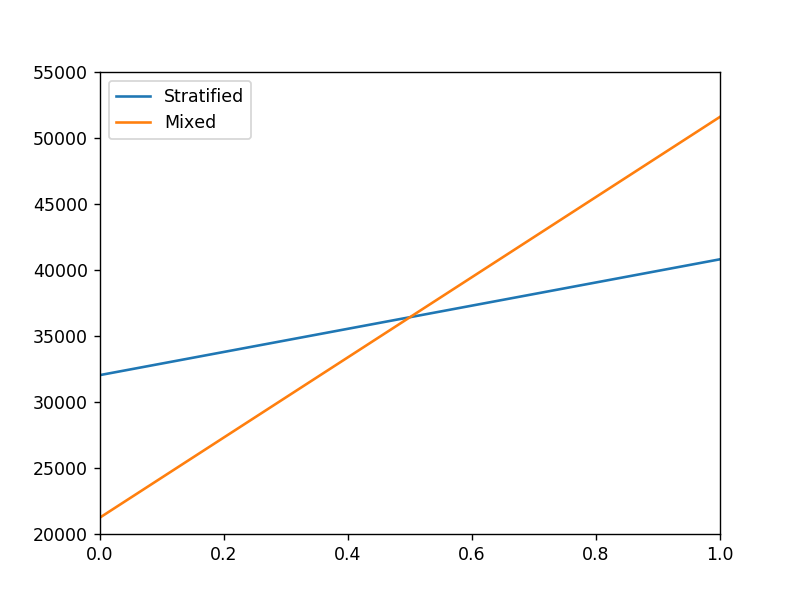

In [28]:
fig, ax = plt.subplots()

ax.plot(SoC, loss_strat(T_h, T_l, T_a, SoC, d_i, lam_i, volume, ar), label='Stratified')
ax.plot(SoC, loss_mixed(T_h, T_l, T_a, SoC, d_i, lam_i, volume, ar), label='Mixed')

ax.legend()

## Different storage size, constant ar

In [29]:
volumes = np.logspace(2, 5, 10)
SoC = np.linspace(0,1,50)
T_h = 80
T_l = 40
T_a = 20
ar = 0.2
print volumes

[   100.            215.443469      464.15888336   1000.
   2154.43469003   4641.58883361  10000.          21544.34690032
  46415.88833613 100000.        ]


<IPython.core.display.Javascript object>


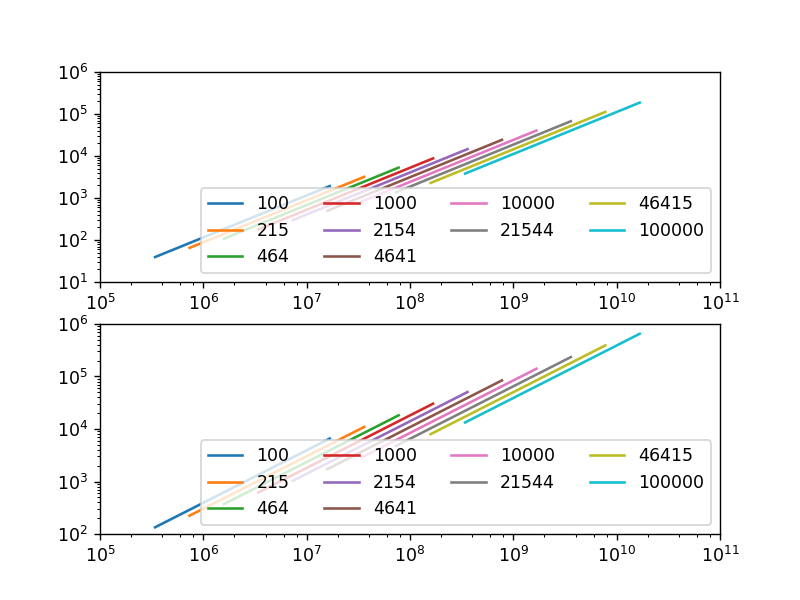

In [38]:
fig, axs = plt.subplots(2,1)

ssloss = {}

for vol in volumes:
    losses = loss_strat(T_h, T_l, T_a, SoC, d_i, lam_i, vol, ar)
    storen = SoC * vol * 4180 * (T_h-T_l)
    axs[0].loglog(storen, losses-losses[0], label = int(vol))
    ssloss[vol] = losses[0]
axs[0].legend(ncol=4)

for vol in volumes:
    losses = loss_mixed(T_h, T_l, T_a, SoC, d_i, lam_i, vol, ar)
    storen = SoC * vol * 4180 * (T_h-T_l)
    axs[1].loglog(storen, losses-losses[0], label = int(vol))
axs[1].legend(ncol=4)


<IPython.core.display.Javascript object>


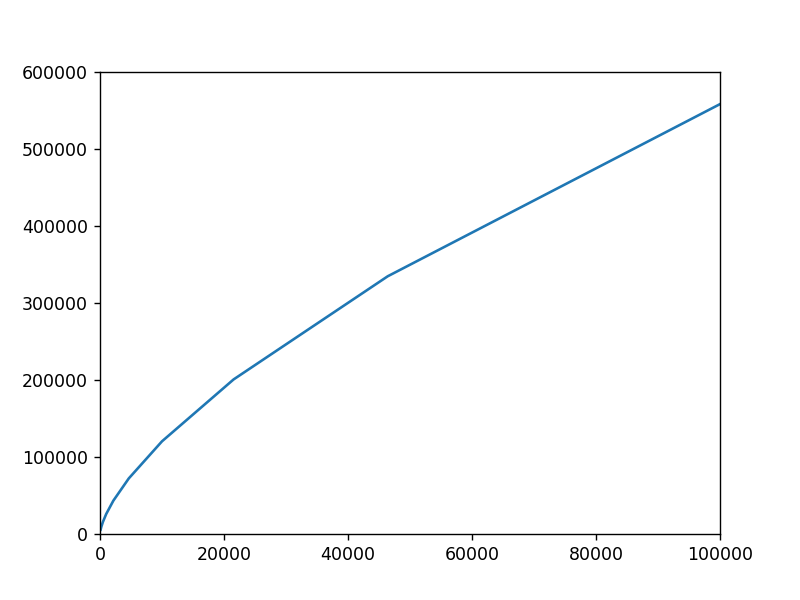

In [37]:
fig, ax = plt.subplots()

x = volumes
y = [ssloss[vol] for vol in volumes]
ax.plot(x,y)

In [32]:
import statsmodels as sm

In [ ]:
sm.OLS()